<a href="https://colab.research.google.com/github/haberkornm/Convolutional-Neural-Network-Of-Corn-Leaf-Disease-Images/blob/main/Image_Averages_and_Stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Mounting google drive so images can be loaded
from google.colab import drive

drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
from tqdm import tqdm
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import PIL
import pandas as pd
from skimage import io

#Average Images

In [ ]:
#Will be using 180 x 180 RGB images to calculate averages
dataset_url = "/content/drive/MyDrive/CNN/RGB"

In [ ]:
#Creat list of images for each directory in RGB file
Blight = glob(os.path.join(dataset_url+"/Blight/"+"*"))
Common_Rust = glob(os.path.join(dataset_url+"/Common_Rust/"+"*"))
Gray_Leaf_Spot = glob(os.path.join(dataset_url+"/Gray_Spot/"+"*"))
healthy = glob(os.path.join(dataset_url+"/Healthy/"+"*"))

Method for calculating image average adapted from the following blog:
https://pythonmatplotlibtips.blogspot.com/2018/01/generate-average-image-using-python-and-PIL.html

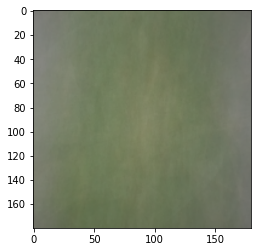

In [ ]:
#Image average for first 300 images of blight
blight_ims = []
for i in range(300):
    blight_ims.append(Image.open(Blight[i], mode='r'))

blight_ims = np.array([np.array(im) for im in blight_ims])

blight_ave = np.average(blight_ims,axis=0)

blight_result = Image.fromarray(blight_ave.astype('uint8'))

plt.imshow(blight_result)
plt.show()

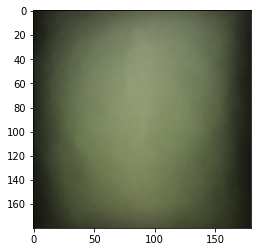

In [ ]:
#Image average for first 300 images of common rust
rust_ims = []
for i in range(300):
    rust_ims.append(Image.open(Common_Rust[i], mode='r'))

rust_ims = np.array([np.array(im) for im in rust_ims])

rust_ave = np.average(rust_ims,axis=0)

rust_result = Image.fromarray(rust_ave.astype('uint8'))

plt.imshow(rust_result)
plt.show()

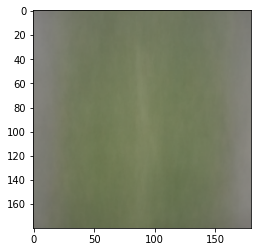

In [ ]:
#Image average for first 300 images of gray leaf spot
spot_ims = []
for i in range(300):
    spot_ims.append(Image.open(Gray_Leaf_Spot[i], mode='r'))

spot_ims = np.array([np.array(im) for im in spot_ims])

spot_ave = np.average(spot_ims,axis=0)

spot_result = Image.fromarray(spot_ave.astype('uint8'))

plt.imshow(spot_result)
plt.show()

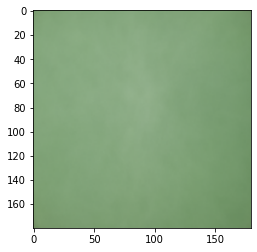

In [ ]:
#Image average for first 300 images of healthy
healthy_ims = []
for i in range(300):
    healthy_ims.append(Image.open(healthy[i], mode='r'))

healthy_ims = np.array([np.array(im) for im in healthy_ims])

healthy_ave = np.average(healthy_ims,axis=0)

healthy_result = Image.fromarray(healthy_ave.astype('uint8'))

plt.imshow(healthy_result)
plt.show()

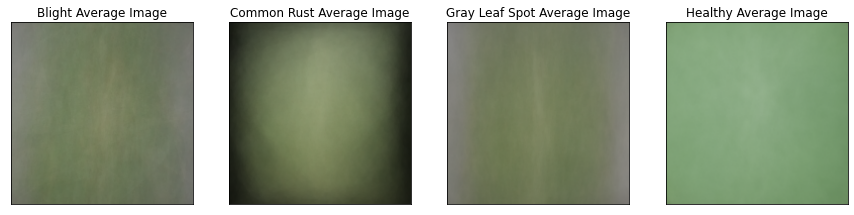

In [ ]:
#Plotting all average images
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(141).grid(False)
_ = plt.imshow(blight_result)
_ = plt.xticks([])
_ = plt.yticks([])
_ = plt.title('Blight Average Image')

ax2 = fig.add_subplot(142).grid(False)
_ = plt.imshow(rust_result)
_ = plt.xticks([])
_ = plt.yticks([])
_ = plt.title('Common Rust Average Image')

ax2 = fig.add_subplot(143).grid(False)
_ = plt.imshow(spot_result)
_ = plt.xticks([])
_ = plt.yticks([])
_ = plt.title('Gray Leaf Spot Average Image')

ax2 = fig.add_subplot(144).grid(False)
_ = plt.imshow(healthy_result)
_ = plt.xticks([])
_ = plt.yticks([])
_ = plt.title('Healthy Average Image')

#Average Pixel Values

In [ ]:
def image_stats(path):
    """ create dictionary of statistics for each image mean/standard deviation of red, green, blue color channels."""
        
    image_dict = {'path':[], 'intensity':[], 'mean_red':[], 'mean_green': [], 'mean_blue':[],
                 'std_red':[], 'std_green':[], 'std_blue':[]}
    
    img_names = os.listdir(path)
    for image in tqdm(img_names):
            img = io.imread(f'{path}/{image}')
            red = img[:, :, 0]
            green = img[:, :, 1]
            blue = img[:, :, 2]
            image_dict['mean_red'].append(np.mean(red))
            image_dict['mean_green'].append(np.mean(green))
            image_dict['mean_blue'].append(np.mean(blue))
            image_dict['std_red'].append(np.std(red))
            image_dict['std_green'].append(np.std(green))
            image_dict['std_blue'].append(np.std(blue))
            image_dict['intensity'].append(np.sum(red)+np.sum(green)+np.sum(blue))
            image_dict['path'].append(image)
            
    return image_dict

In [ ]:
blight_df = pd.DataFrame(image_stats('/content/drive/MyDrive/CNN/RGB/Blight'))

100%|██████████| 1146/1146 [09:20<00:00,  2.05it/s]


In [ ]:
blight_df['label'] = 'Blight'

In [ ]:
blight_df.head()

,path,intensity,mean_red,mean_green,mean_blue,std_red,std_green,std_blue,label
0,157.jpeg,10099067,104.812284,116.669136,90.218179,25.454072,26.218708,25.307212,Blight
1,132.jpeg,10380226,106.920370,114.998272,98.458704,39.649375,41.206536,42.669040,Blight
2,122.jpeg,10934512,105.149444,129.778765,102.556728,32.838057,27.605811,32.742107,Blight
3,196.jpeg,11241548,114.944105,123.307191,108.710062,34.216081,33.941817,31.145846,Blight
4,135.jpeg,10621078,107.306883,125.461235,95.042932,24.101624,20.252076,25.852369,Blight


In [ ]:
rust_df = pd.DataFrame(image_stats('/content/drive/MyDrive/CNN/RGB/Common_Rust'))

100%|██████████| 1306/1306 [10:39<00:00,  2.04it/s]


In [ ]:
rust_df['label'] = 'Rust'
rust_df.head()

,path,intensity,mean_red,mean_green,mean_blue,std_red,std_green,std_blue,label
0,1531.jpeg,5991983,71.339969,104.822500,8.775278,24.739616,21.702586,9.167452,Rust
1,1411.jpeg,8496480,95.196142,98.076821,68.964074,65.928369,67.648050,51.625368,Rust
2,1386.jpeg,5783871,62.972099,72.774815,42.767623,61.494309,69.126646,46.631397,Rust
3,1349.jpeg,7593390,87.289290,85.572191,61.502407,81.949844,80.660698,62.260318,Rust
4,1503.jpeg,9313861,102.595062,107.694938,77.174846,62.051009,62.932435,48.431861,Rust


In [ ]:
spot_df = pd.DataFrame(image_stats('/content/drive/MyDrive/CNN/RGB/Gray_Spot'))
spot_df['label'] = 'Spot'
spot_df.head()

100%|██████████| 574/574 [04:41<00:00,  2.04it/s]


,path,intensity,mean_red,mean_green,mean_blue,std_red,std_green,std_blue,label
0,2480.jpeg,12073964,134.433148,128.622130,109.597932,46.865895,43.539692,57.746094,Spot
1,2619.jpeg,9684559,100.445926,118.816265,79.643951,37.953196,27.623691,38.453319,Spot
2,2519.jpeg,12799114,127.739475,141.759660,125.535247,60.584304,61.692630,65.552408,Spot
3,2530.jpeg,11355628,102.539753,129.243796,118.698796,42.936355,44.613028,44.463344,Spot
4,2552.jpeg,10677260,111.086204,128.861512,89.597346,54.878337,58.771223,50.801817,Spot


In [ ]:
healthy_df = pd.DataFrame(image_stats('/content/drive/MyDrive/CNN/RGB/Healthy'))
healthy_df['label'] = 'Healthy'
healthy_df.head()

100%|██████████| 1162/1162 [09:26<00:00,  2.05it/s]


,path,intensity,mean_red,mean_green,mean_blue,std_red,std_green,std_blue,label
0,3165.jpeg,18954897,193.538673,212.885216,178.603796,34.615527,26.334896,40.593873,Healthy
1,3410.jpeg,12442077,113.266358,156.211512,114.536852,29.835488,24.498144,36.929146,Healthy
2,3167.jpeg,13688674,138.397160,166.223056,117.869722,29.084162,23.673839,30.823790,Healthy
3,3257.jpeg,14877724,129.807284,176.141481,153.240247,23.155213,17.224023,22.327336,Healthy
4,3262.jpeg,17363185,173.641019,199.425154,162.834599,31.603799,23.967932,36.229558,Healthy


In [ ]:
blight_df.to_csv('/content/drive/MyDrive/CNN/blight_stats.csv')
rust_df.to_csv('/content/drive/MyDrive/CNN/rust_stats.csv')
spot_df.to_csv('/content/drive/MyDrive/CNN/spot_stats.csv')
healthy_df.to_csv('/content/drive/MyDrive/CNN/healthy_stats.csv')

#Plotting Image Stats

In [ ]:
blight = pd.read_csv('/content/drive/MyDrive/CNN/blight_stats.csv')
rust = pd.read_csv('/content/drive/MyDrive/CNN/rust_stats.csv')
spot = pd.read_csv('/content/drive/MyDrive/CNN/spot_stats.csv')
healthy = pd.read_csv('/content/drive/MyDrive/CNN/healthy_stats.csv')

In [ ]:
healthy.columns

Index(['Unnamed: 0', 'path', 'intensity', 'mean_red', 'mean_green',
       'mean_blue', 'std_red', 'std_green', 'std_blue', 'label'],
      dtype='object')

In [ ]:
import seaborn as sns

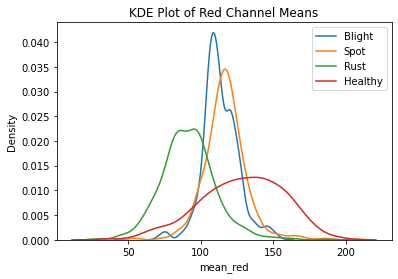

In [ ]:
sns.kdeplot(blight.mean_red)
sns.kdeplot(spot.mean_red)
sns.kdeplot(rust.mean_red)
sns.kdeplot(healthy.mean_red)
plt.legend(labels=['Blight', 'Spot', 'Rust', 'Healthy'],loc='upper right')
plt.title('KDE Plot of Red Channel Means')
plt.show()

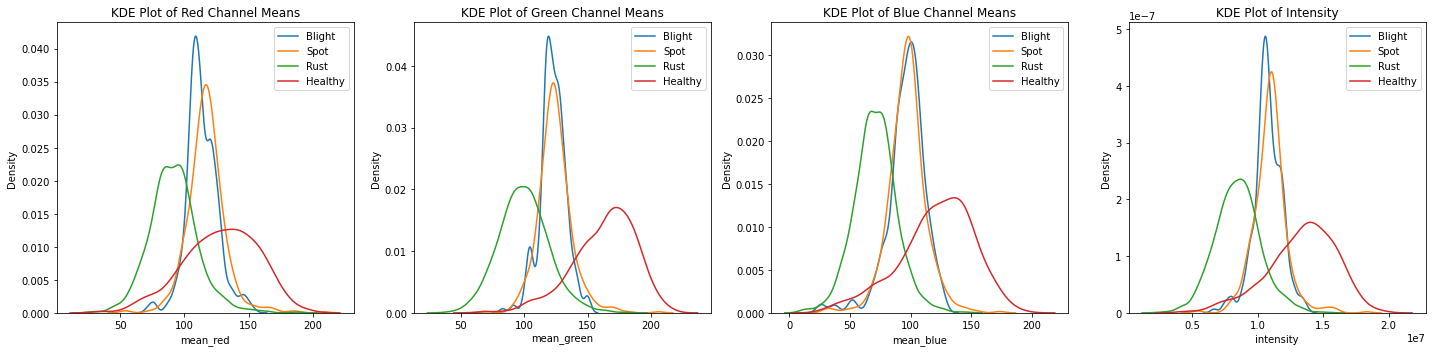

In [ ]:
f = plt.figure(figsize=(20,5))
ax1 = f.add_subplot(141).grid(False)
sns.kdeplot(blight.mean_red)
sns.kdeplot(spot.mean_red)
sns.kdeplot(rust.mean_red)
sns.kdeplot(healthy.mean_red)
plt.legend(labels=['Blight', 'Spot', 'Rust', 'Healthy'],loc='upper right')
plt.title('KDE Plot of Red Channel Means')

ax2 = f.add_subplot(142).grid(False) 
sns.kdeplot(blight.mean_green)
sns.kdeplot(spot.mean_green)
sns.kdeplot(rust.mean_green)
sns.kdeplot(healthy.mean_green)
plt.legend(labels=['Blight', 'Spot', 'Rust', 'Healthy'],loc='upper right')
plt.title('KDE Plot of Green Channel Means')

ax3 = f.add_subplot(143).grid(False) 
sns.kdeplot(blight.mean_blue)
sns.kdeplot(spot.mean_blue)
sns.kdeplot(rust.mean_blue)
sns.kdeplot(healthy.mean_blue)
plt.legend(labels=['Blight', 'Spot', 'Rust', 'Healthy'],loc='upper right')
plt.title('KDE Plot of Blue Channel Means')

ax4 = f.add_subplot(144).grid(False)
sns.kdeplot(blight.intensity)
sns.kdeplot(spot.intensity)
sns.kdeplot(rust.intensity)
sns.kdeplot(healthy.intensity)
plt.legend(labels=['Blight', 'Spot', 'Rust', 'Healthy'],loc='upper right')
plt.title('KDE Plot of Intensity')

plt.tight_layout()

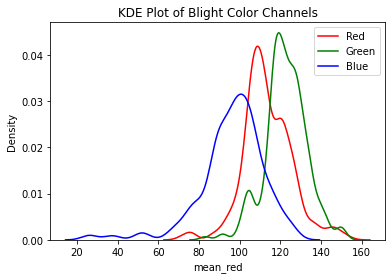

In [ ]:
sns.kdeplot(blight.mean_red, color='Red')
sns.kdeplot(blight.mean_green, color='Green')
sns.kdeplot(blight.mean_blue, color= 'Blue')
plt.legend(labels=['Red', 'Green', 'Blue', 'Intensity'],loc='upper right')
plt.title('KDE Plot of Blight Color Channels')
plt.show()

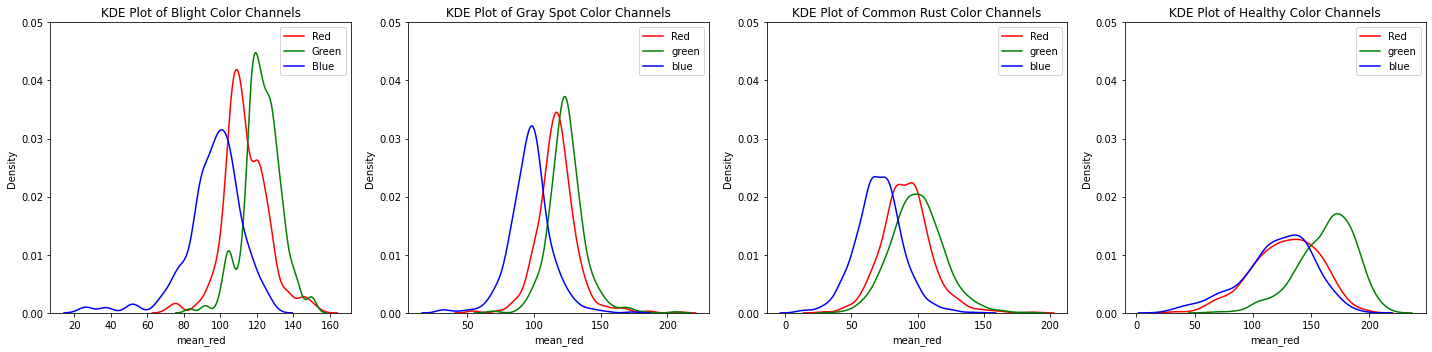

In [ ]:
f = plt.figure(figsize=(20,5))
ax1 = f.add_subplot(141).grid(False)
sns.kdeplot(blight.mean_red, color='Red')
sns.kdeplot(blight.mean_green, color='Green')
sns.kdeplot(blight.mean_blue, color='Blue')
plt.ylim((0.0, 0.05))
plt.legend(labels=['Red', 'Green', 'Blue'],loc='upper right')
plt.title('KDE Plot of Blight Color Channels')

ax2 = f.add_subplot(142).grid(False) 
sns.kdeplot(spot.mean_red, color = 'Red')
sns.kdeplot(spot.mean_green, color='Green')
sns.kdeplot(spot.mean_blue, color='Blue')
plt.ylim((0.0, 0.05))
plt.legend(labels=['Red', 'green', 'blue'],loc='upper right')
plt.title('KDE Plot of Gray Spot Color Channels')

ax3 = f.add_subplot(143).grid(False) 
sns.kdeplot(rust.mean_red, color='Red')
sns.kdeplot(rust.mean_green, color='Green')
sns.kdeplot(rust.mean_blue, color='Blue')
plt.ylim((0.0, 0.05))
plt.legend(labels=['Red', 'green', 'blue'],loc='upper right')
plt.title('KDE Plot of Common Rust Color Channels')

ax4 = f.add_subplot(144).grid(False)
sns.kdeplot(healthy.mean_red, color='Red')
sns.kdeplot(healthy.mean_green, color='Green')
sns.kdeplot(healthy.mean_blue, color='Blue')
plt.ylim((0.0, 0.05))
plt.legend(labels=['Red', 'green', 'blue'],loc='upper right')
plt.title('KDE Plot of Healthy Color Channels')

plt.tight_layout()

#Modeling Image Stats

In [ ]:
stats_df = blight.append(rust).append(spot).append(healthy)

In [ ]:
stats_df = stats_df.drop(columns=['Unnamed: 0', 'path'])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(stats_df.drop(columns = 'label'), stats_df.label, test_size=0.33, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [ ]:
#Creat random forest classifier
rfc = RandomForestClassifier(random_state = 42)

#Hyperparameter grid
param_grid = {'n_estimators': [100, 150, 200, 250, 400],
             'max_features': ['auto', 'sqrt'],
             'max_depth' : [5, 6, 7, 8, 9]}

In [ ]:
#GridSearchCV for random forest
rfc_cv = GridSearchCV(rfc, param_grid, cv=5)
#build model    
rfc_cv.fit(X_train, y_train)
#predict using model
y_pred = rfc_cv.predict(X_test)

In [ ]:
#Best score and parameters determined from gridsearch cv
print('Best score:', rfc_cv.best_score_)
print('Best parameters:', rfc_cv.best_params_)

Best score: 0.8645276292335116
Best parameters: {'max_depth': 9, 'max_features': 'auto', 'n_estimators': 200}


In [ ]:
print('Training accuracy: ', rfc_cv.score(X_train, y_train))
print('Test set accuracy: ', rfc_cv.score(X_test, y_test))

Training accuracy:  0.9283422459893048
Test set accuracy:  0.866232827187274


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Blight       0.76      0.98      0.86       394
     Healthy       0.95      0.98      0.97       383
        Rust       0.92      0.93      0.93       424
        Spot       0.75      0.24      0.37       182

    accuracy                           0.87      1383
   macro avg       0.85      0.78      0.78      1383
weighted avg       0.86      0.87      0.84      1383

